<a href="https://colab.research.google.com/github/evilNami/Unlocking-Instagram-Engagement-Patterns-A-Clustering-Approach/blob/main/Instragram_Influencer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mounting "top_insta_influencers_data.csv" from my drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_folder_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/db/top_insta_influencers_data (1).csv'
try:
  df = pd.read_csv(file_path)
  print("File loaded successfully.")
  # Now you can work with the DataFrame 'df'
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the path.")
except pd.errors.EmptyDataError:
  print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the file at {file_path}. Please check if it's a valid CSV file.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully.
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


In [ ]:

# Loading dataset
df = pd.read_csv(file_path)

# Converting numerical columns with "k", "m", "b" suffixes
def convert_numeric(value):
    if isinstance(value, str):
        value = value.lower().replace(",", "")
        if "k" in value:
            return float(value.replace("k", "")) * 1e3
        elif "m" in value:
            return float(value.replace("m", "")) * 1e6
        elif "b" in value:
            return float(value.replace("b", "")) * 1e9
        else:
            return float(value)
    return value

# Applying conversion
numeric_cols = ["posts", "followers", "avg_likes", "new_post_avg_like", "total_likes"]
for col in numeric_cols:
    df[col] = df[col].apply(convert_numeric)

# Converting engagement rate
df["60_day_eng_rate"] = df["60_day_eng_rate"].str.replace("%", "").astype(float) / 100

# Handling missing values
df.fillna({"country": "Unknown"}, inplace=True)
df.dropna(inplace=True)

# Displaying cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               199 non-null    int64  
 1   channel_info       199 non-null    object 
 2   influence_score    199 non-null    int64  
 3   posts              199 non-null    float64
 4   followers          199 non-null    float64
 5   avg_likes          199 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  199 non-null    float64
 8   total_likes        199 non-null    float64
 9   country            199 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 17.1+ KB


In [ ]:
missing_countries = df[df["country"] == "Unknown"]
print(missing_countries)


     rank        channel_info  influence_score   posts    followers  \
2       3            leomessi               90   890.0  357300000.0   
15     16         virat.kohli               87  1400.0  211800000.0   
18     19          mileycyrus               89  1200.0  181500000.0   
20     21           katyperry               92  2000.0  170300000.0   
26     27           kingjames               86  2300.0  130900000.0   
..    ...                 ...              ...     ...          ...   
179   180     sachintendulkar               76  1000.0   35300000.0   
182   183            lunamaya               83  4100.0   34800000.0   
183   184           toni.kr8s               83   940.0   34700000.0   
185   186  paollaoliveirareal               84  4600.0   34700000.0   
187   188     adidasoriginals               83   150.0   34200000.0   

     avg_likes  60_day_eng_rate  new_post_avg_like   total_likes  country  
2    6800000.0           0.0124          4400000.0  6.000000e+09  Unkno

In [ ]:
country_updates = {
    "leomessi": "Argentina",
    "virat.kohli": "India",
    "mileycyrus": "United States",
    "katyperry": "United States",
    "kingjames": "United States",
    "fcbarcelona": "Spain",
    "billieeilish": "United States",
    "lalalalisa_m": "South Korea",
    "Shakira": "Colombia",
    "snoopdogg": "United States",
    "shraddhakapoor": "India",
    "k.mbappe": "France",
    "jennierubyjane": "South Korea",
    "tomholland2013": "United Kingdom",
    "sooyaaa__": "South Korea",
    "akshaykumar" : "India",
    "roses_are_rosie": "South Korea",
    "anushkasharma" : "India",
    "iamzlatanibrahimovic" : "Sweden",
    "leonardodicaprio" : "United States",
    "juventus" : "Italy",
    "sunnyleone" : "India",
    "sergioramos" : "Spain",
    "jbalvin": "Colombia",
    "mosalah": "Egypt",
    "michelleobama": "United States",
    "thv": "South Korea",
    "charlidamelio": "United States",
    "paulodybala": "Argentina",
    "blackpinkofficial": "South Korea",
    "garethbale11": "United Kingdom",
    "jokowi": "Indonesia",
    "haileybieber": "United States",
    "stephencurry30": "United States",
    "vancityreynolds": "United States",
    "luissuarez9": "Uruguay",
    "jannatzubair29": "India",
    "kapilsharma": "India",
    "badbunnypr": "Puerto Rica",
    "j.m": "South Korea",
    "theweeknd": "Canada",
    "dior": "France",
    "jenniferaniston": "United States",
    "addisonraee": "United States",
    "mahi7781": "India",
    "georginagio": "United Arab Emirates",
    "cznburak": "Turkey",
    "anushkasen0408": "India",
    "prattprattpratt": "United States",
    "marvelstudios": "United States",
    "wesleysafadao": "Brazil",
    "parineetichopra": "India",
    "rkive": "South Korea",
    "gisel_la": "Indonesia",
    "colesprouse": "United States",
    "shahidkapoor": "India",
    "sachintendulkar": "India",
    "lunamaya": "Indonesia",
    "toni.kr8s": "Germany",
    "paollaoliveirareal": "Brazil",
    "adidasoriginals": "Germany",
    "natashawilona12": "Indonesia",

}

for user, country in country_updates.items():
    df.loc[df["channel_info"] == user, "country"] = country


In [ ]:
print(df.head())  # Displays the first 5 rows of the dataset


   rank channel_info  influence_score   posts    followers  avg_likes  \
0     1    cristiano               92  3300.0  475800000.0  8700000.0   
1     2  kyliejenner               91  6900.0  366200000.0  8300000.0   
2     3     leomessi               90   890.0  357300000.0  6800000.0   
3     4  selenagomez               93  1800.0  342700000.0  6200000.0   
4     5      therock               91  6800.0  334100000.0  1900000.0   

   60_day_eng_rate  new_post_avg_like   total_likes        country  
0           0.0139          6500000.0  2.900000e+10          Spain  
1           0.0162          5900000.0  5.740000e+10  United States  
2           0.0124          4400000.0  6.000000e+09      Argentina  
3           0.0097          3300000.0  1.150000e+10  United States  
4           0.0020           665300.0  1.250000e+10  United States  


In [ ]:
# Summary Statistics
print("\n Summary Statistics of Dataset:")
print(df.describe())

###  Compute Median ###
stats = {
    "Metric": ["Engagement Rate", "Likes", "Followers"],
    "Median": [df["60_day_eng_rate"].median(), df["avg_likes"].median(), df["followers"].median()]
}
stats_df = pd.DataFrame(stats)
print(stats_df)
print("\n")

# 3. Check for any remaining missing values
print("Missing values per column:\n", df.isnull().sum())

# 4. Convert columns to appropriate data types if needed
# Example: if 'posts' is read as an object, convert to int
# df["posts"] = df["posts"].astype(int)



 Summary Statistics of Dataset:
             rank  influence_score         posts     followers     avg_likes  \
count  199.000000       199.000000    199.000000  1.990000e+02  1.990000e+02   
mean   100.160804        81.814070   3516.884422  7.761256e+07  1.741310e+06   
std     57.825532         8.900153   3476.215047  7.381699e+07  2.100856e+06   
min      1.000000        22.000000     10.000000  3.280000e+07  6.510000e+04   
25%     50.500000        80.000000    950.000000  4.005000e+07  5.031000e+05   
50%    100.000000        84.000000   2100.000000  5.020000e+07  1.100000e+06   
75%    149.500000        86.000000   5050.000000  6.890000e+07  2.100000e+06   
max    200.000000        93.000000  17500.000000  4.758000e+08  1.540000e+07   

       60_day_eng_rate  new_post_avg_like   total_likes  
count       199.000000       1.990000e+02  1.990000e+02  
mean          0.019020       1.214204e+06  3.670465e+09  
std           0.033297       1.861019e+06  5.573215e+09  
min           

In [ ]:

### Outlier Detection: Engagement Rate, Likes, Followers ###
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_engagement = detect_outliers("60_day_eng_rate")
outliers_likes = detect_outliers("avg_likes")
outliers_followers = detect_outliers("followers")
print(" Outliers in Engagement Rate:\n", outliers_engagement)
print(" Outliers in Likes:\n", outliers_likes)
print(" Outliers in Followers:\n", outliers_followers)

In [ ]:
print(" Outliers in Engagement Rate:\n", outliers_engagement)

 Outliers in Engagement Rate:
      rank        channel_info  influence_score   posts    followers  \
32     33        billieeilish               73   690.0  105200000.0   
38     39        lalalalisa_m               70   870.0   80900000.0   
49     50      jennierubyjane               76   860.0   68900000.0   
53     54      tomholland2013               77  1200.0   67700000.0   
56     57  bts.bighitofficial               78  1200.0   66900000.0   
64     65           sooyaaa__               82   830.0   62900000.0   
69     70     roses_are_rosie               82   820.0   61800000.0   
75     76    milliebobbybrown               80   280.0   57600000.0   
78     79              karolg               83  3300.0   55600000.0   
83     84            zacefron               86   660.0   54500000.0   
102   103                 thv               83    60.0   49300000.0   
114   115         harrystyles               57   590.0   46900000.0   
118   119                zayn               82

In [ ]:
print(" Outliers in Likes:\n", outliers_likes)

 Outliers in Likes:
      rank     channel_info  influence_score   posts    followers   avg_likes  \
0       1        cristiano               92  3300.0  475800000.0   8700000.0   
1       2      kyliejenner               91  6900.0  366200000.0   8300000.0   
2       3         leomessi               90   890.0  357300000.0   6800000.0   
3       4      selenagomez               93  1800.0  342700000.0   6200000.0   
10     11    kendalljenner               90   660.0  254000000.0   5500000.0   
22     23          zendaya               87  3500.0  150700000.0   5800000.0   
32     33     billieeilish               73   690.0  105200000.0   8500000.0   
38     39     lalalalisa_m               70   870.0   80900000.0   5800000.0   
49     50   jennierubyjane               76   860.0   68900000.0   5100000.0   
53     54   tomholland2013               77  1200.0   67700000.0   5400000.0   
64     65        sooyaaa__               82   830.0   62900000.0   4500000.0   
69     70  roses_ar

In [ ]:
print(" Outliers in Followers:\n", outliers_followers)

 Outliers in Followers:
     rank        channel_info  influence_score    posts    followers  \
0      1           cristiano               92   3300.0  475800000.0   
1      2         kyliejenner               91   6900.0  366200000.0   
2      3            leomessi               90    890.0  357300000.0   
3      4         selenagomez               93   1800.0  342700000.0   
4      5             therock               91   6800.0  334100000.0   
5      6       kimkardashian               91   5600.0  329200000.0   
6      7        arianagrande               92   5000.0  327700000.0   
7      8             beyonce               92   2000.0  272800000.0   
8      9     khloekardashian               89   4100.0  268300000.0   
9     10        justinbieber               91   7400.0  254500000.0   
10    11       kendalljenner               90    660.0  254000000.0   
11    12              natgeo               91  10000.0  237000000.0   
12    13                nike               90    950

In [ ]:

from scipy.stats import zscore

# Selecting relevant columns for anomaly detection
outlier_features = ["followers", "avg_likes", "60_day_eng_rate"]

# Computing Z-scores for each feature
df_zscores = df[outlier_features].apply(zscore)

# Defining a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identifying outliers for each feature
outliers_followers = df[df_zscores["followers"].abs() > threshold]
outliers_likes = df[df_zscores["avg_likes"].abs() > threshold]
outliers_engagement = df[df_zscores["60_day_eng_rate"].abs() > threshold]

# Print outliers
print("\n Followers Outliers (Z-score > 3):")
print(outliers_followers)

print("\n Likes Outliers (Z-score > 3):")
print(outliers_likes)

print("\n Engagement Rate Outliers (Z-score > 3):")
print(outliers_engagement)


📌 Followers Outliers (Z-score > 3):
   rank   channel_info  influence_score   posts    followers  avg_likes  \
0     1      cristiano               92  3300.0  475800000.0  8700000.0   
1     2    kyliejenner               91  6900.0  366200000.0  8300000.0   
2     3       leomessi               90   890.0  357300000.0  6800000.0   
3     4    selenagomez               93  1800.0  342700000.0  6200000.0   
4     5        therock               91  6800.0  334100000.0  1900000.0   
5     6  kimkardashian               91  5600.0  329200000.0  3500000.0   
6     7   arianagrande               92  5000.0  327700000.0  3700000.0   

   60_day_eng_rate  new_post_avg_like   total_likes        country  
0           0.0139          6500000.0  2.900000e+10          Spain  
1           0.0162          5900000.0  5.740000e+10  United States  
2           0.0124          4400000.0  6.000000e+09      Argentina  
3           0.0097          3300000.0  1.150000e+10  United States  
4           0.002

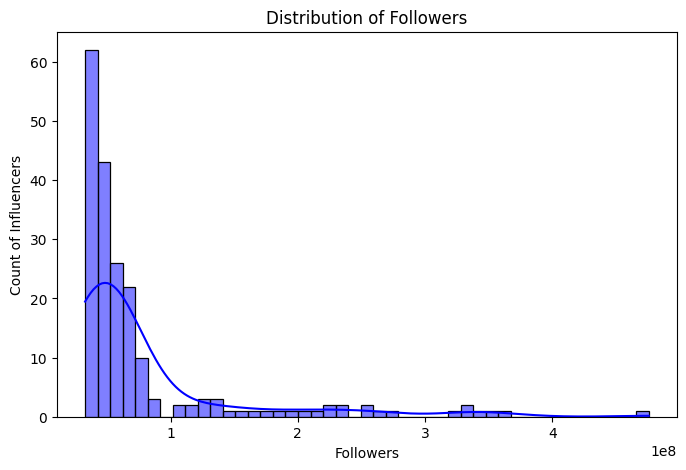

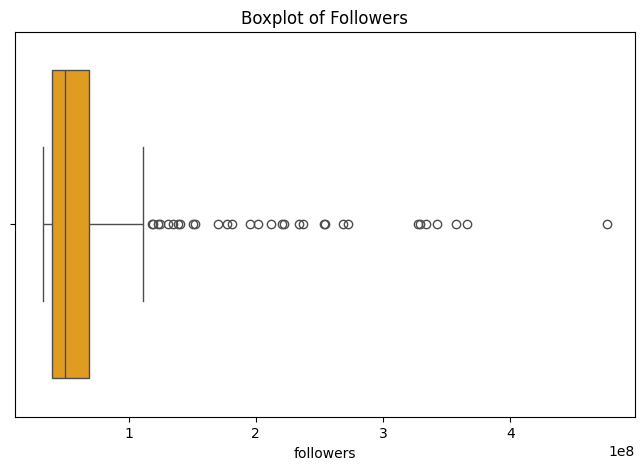

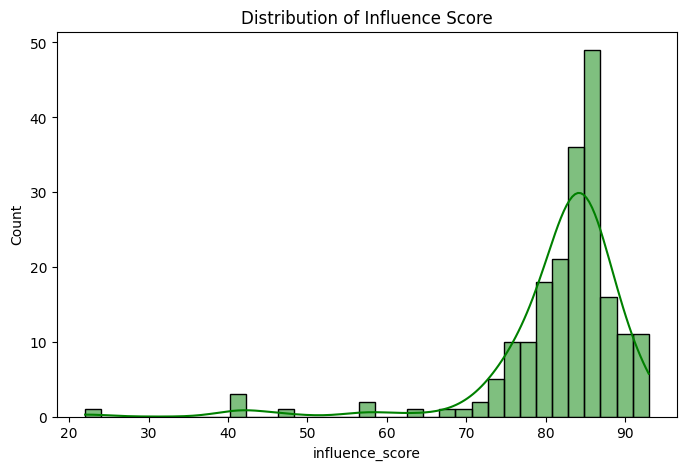

<ipython-input-28-7832967ae5fd>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


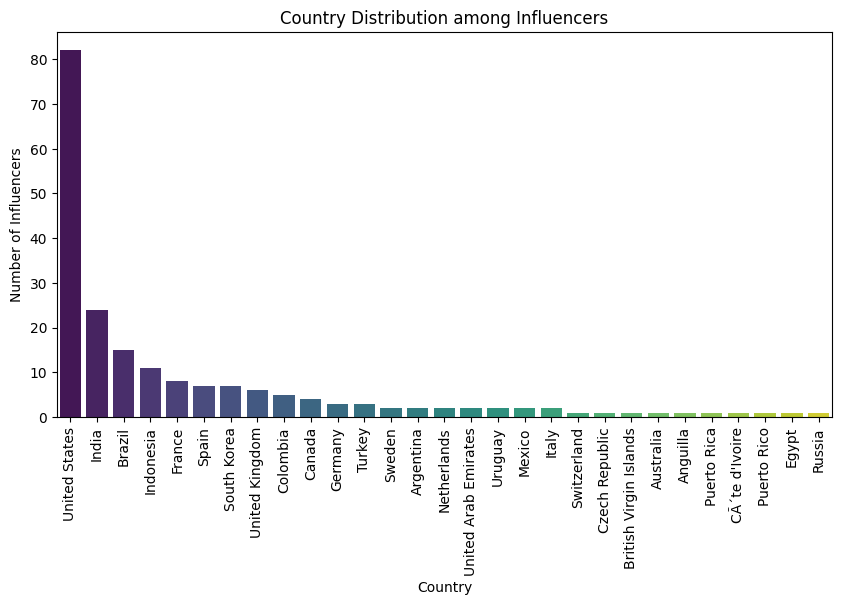

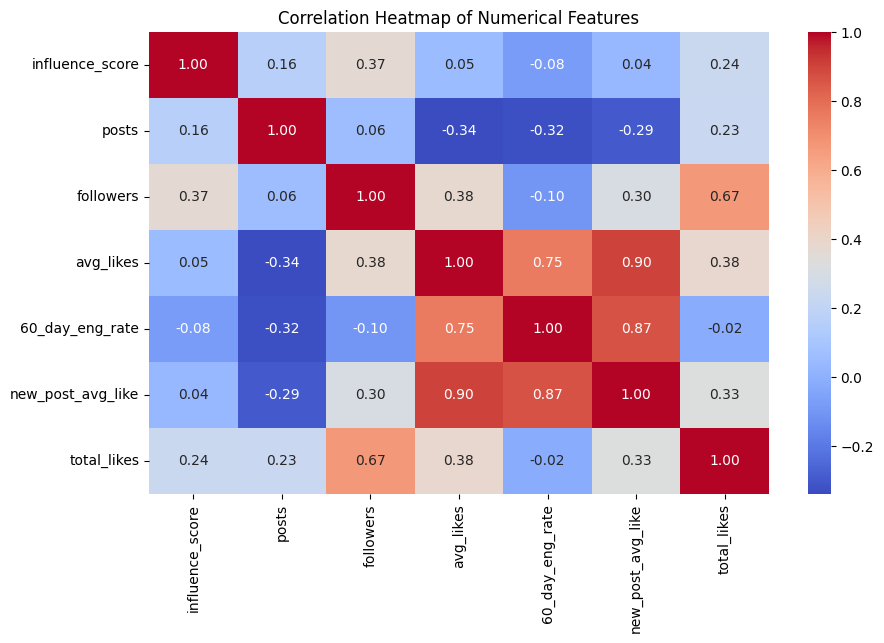

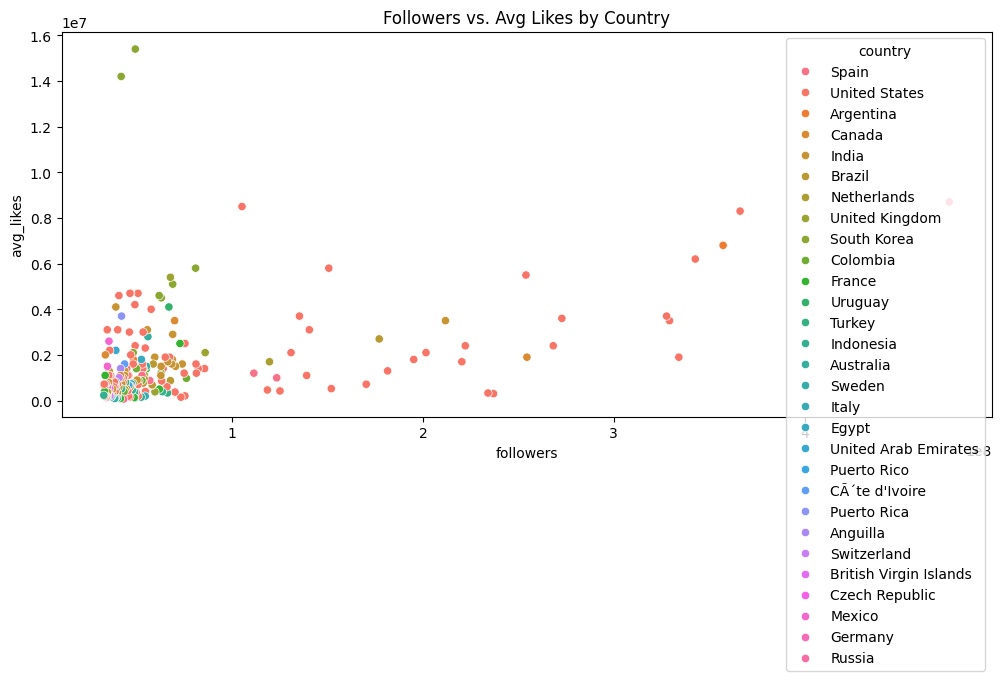

In [ ]:

# 5. Univariate Analysis

# a. Distribution (Histogram) of Followers
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='followers', kde=True, color='blue')
plt.title("Distribution of Followers")
plt.xlabel("Followers")
plt.ylabel("Count of Influencers")
plt.show()

# b. Boxplot for Followers to see Outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='followers', color='orange')
plt.title("Boxplot of Followers")
plt.show()

# c. Distribution of Influence Score
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='influence_score', kde=True, color='green')
plt.title("Distribution of Influence Score")
plt.show()

# d. Bar Chart for Country Counts
plt.figure(figsize=(10,5))
country_counts = df['country'].value_counts().sort_values(ascending=False)
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Country Distribution among Influencers")
plt.ylabel("Number of Influencers")
plt.xlabel("Country")
plt.show()


# 6. Bivariate / Multivariate Analysis

# a. Correlation Matrix
numerical_cols = ['influence_score','posts','followers','avg_likes','60_day_eng_rate','new_post_avg_like','total_likes']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# b. Scatter Plot Example: followers vs. avg_likes
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='followers', y='avg_likes', hue='country')
plt.title("Followers vs. Avg Likes by Country")
plt.show()

# 7. Document Observations
# Example checks you might note:
# - Do we see a strong positive relationship between followers and avg_likes?
# - Which countries have the highest number of top influencers?
# - Are there outliers with extremely high followers or likes?


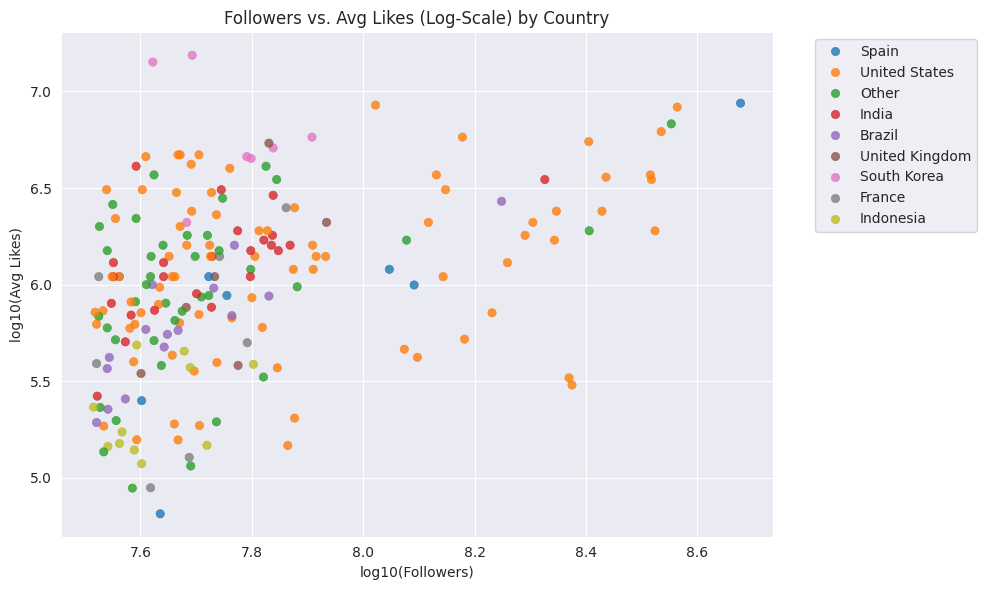

In [ ]:
# --- Adding log-transformed columns ---

df["followers_log"] = np.log10(df["followers"])
df["avg_likes_log"] = np.log10(df["avg_likes"])

# --- Grouping less frequent countries under "Other" for Simplification ---
top_countries = df["country"].value_counts().nlargest(8).index
df["country_group"] = df["country"].where(df["country"].isin(top_countries), "Other")

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Creating a scatterplot on the log-transformed values
scatter = sns.scatterplot(
    data=df,
    x="followers_log",
    y="avg_likes_log",
    hue="country_group",
    alpha=0.8,         # slightly transparent points
    edgecolor=None
)

scatter.set_title("Followers vs. Avg Likes (Log-Scale) by Country")
scatter.set_xlabel("log10(Followers)")
scatter.set_ylabel("log10(Avg Likes)")

# Place the legend outside the plot for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

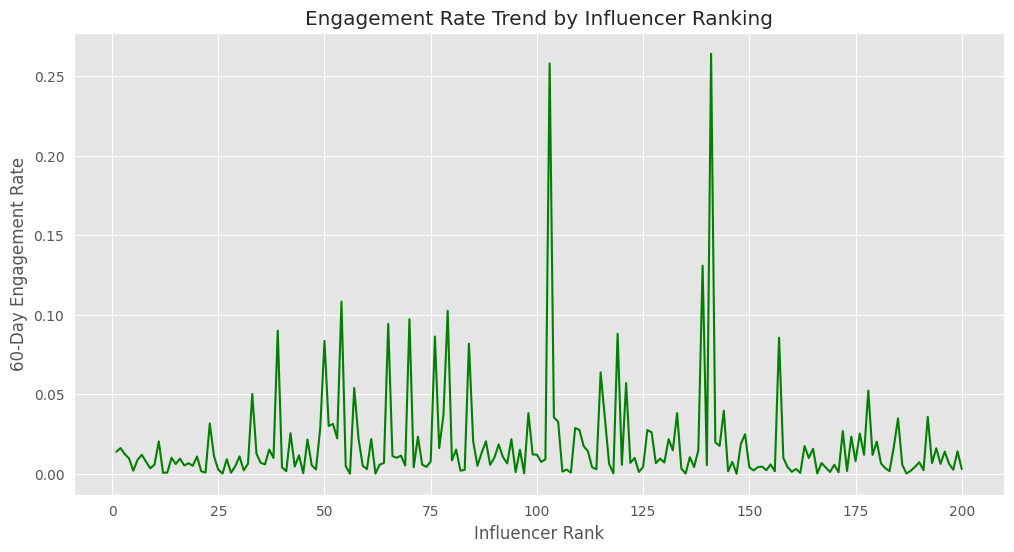

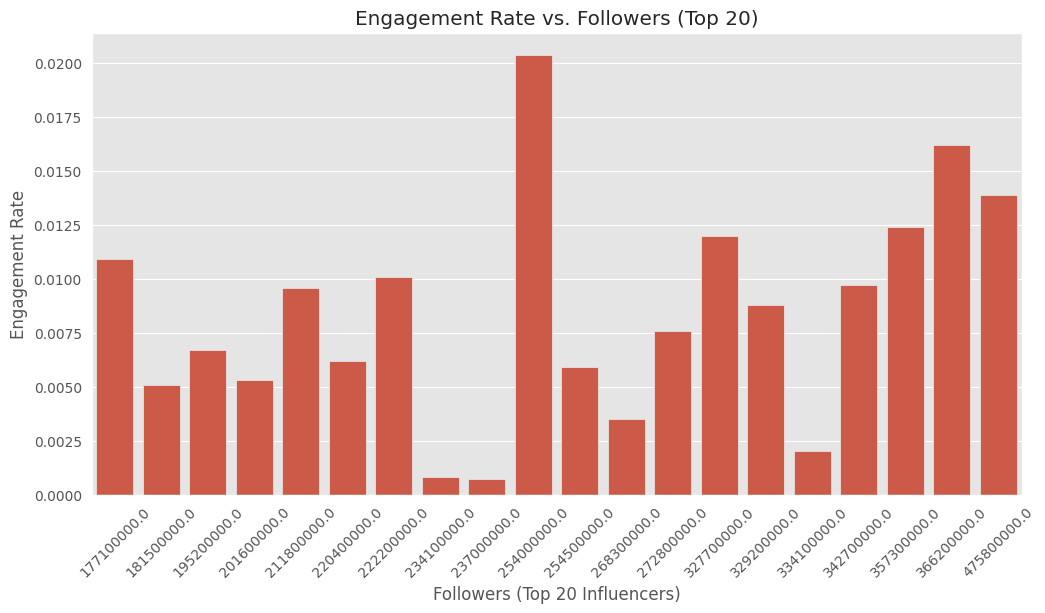

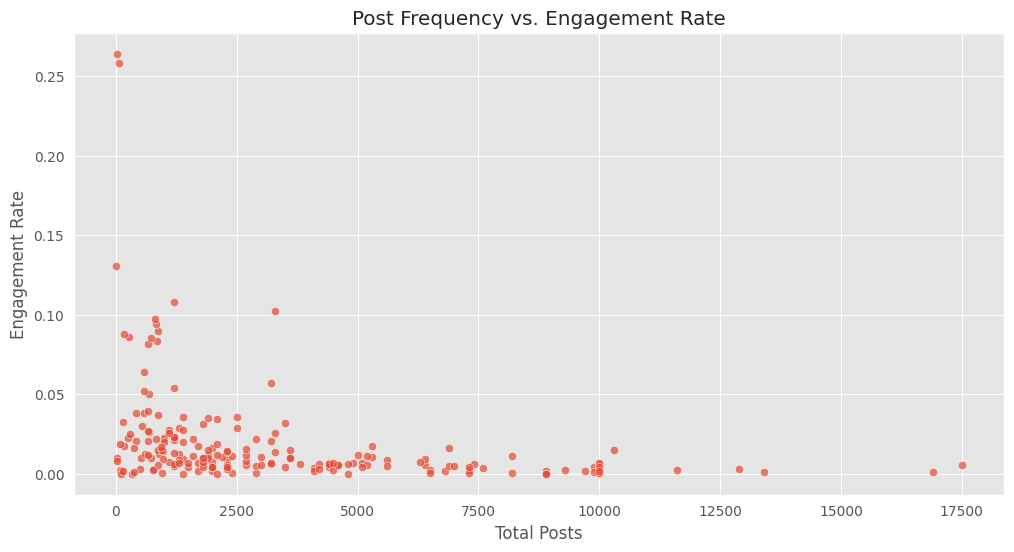

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

### Line Chart: Trends in Engagement Rate Over Influencer Ranking ###
plt.figure(figsize=(12, 6))
plt.plot(df["rank"], df["60_day_eng_rate"],  linestyle='-', color='g')
plt.xlabel("Influencer Rank")
plt.ylabel("60-Day Engagement Rate")
plt.title("Engagement Rate Trend by Influencer Ranking")
plt.show()

### Bar Chart: Engagement Rate vs. Followers ###
plt.figure(figsize=(12, 6))
sns.barplot(x=df["followers"][:20], y=df["60_day_eng_rate"][:20])  # Top 20 influencers
plt.xticks(rotation=45)
plt.xlabel("Followers (Top 20 Influencers)")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate vs. Followers (Top 20)")
plt.show()

### Scatter Plot: Post Frequency vs. Engagement ###
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["posts"], y=df["60_day_eng_rate"], alpha=0.7)
plt.xlabel("Total Posts")
plt.ylabel("Engagement Rate")
plt.title("Post Frequency vs. Engagement Rate")
plt.show()


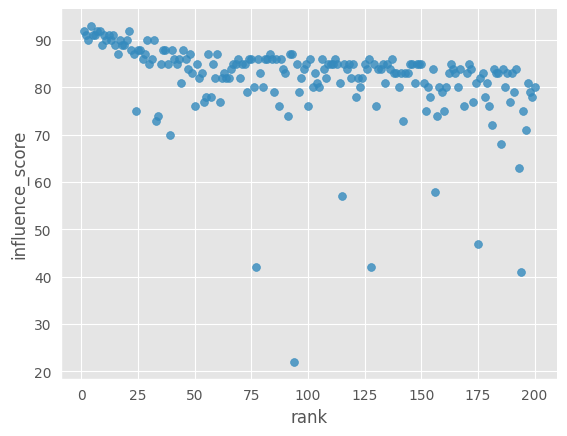

In [ ]:
# @title rank vs influence_score

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rank', y='influence_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

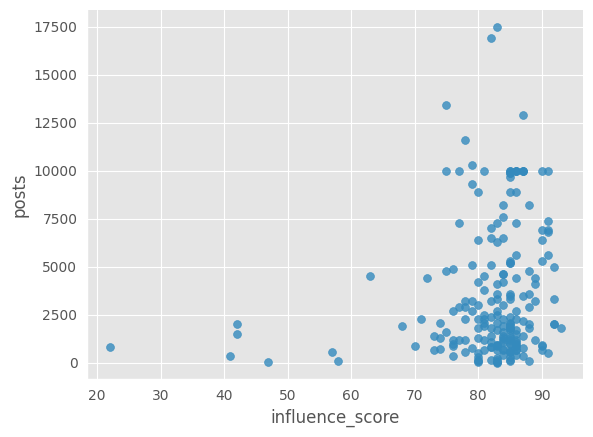

In [ ]:
# @title influence_score vs posts

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='influence_score', y='posts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

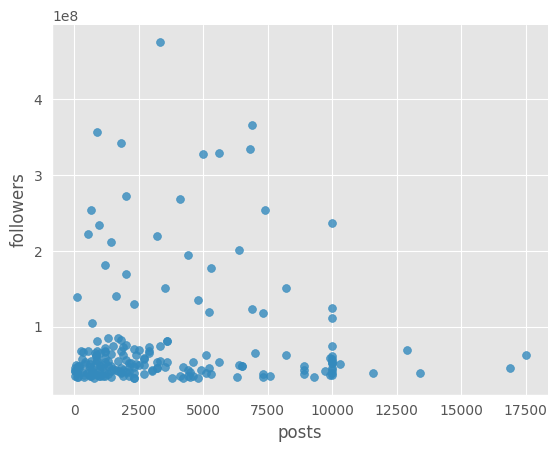

In [ ]:
# @title posts vs followers

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='posts', y='followers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

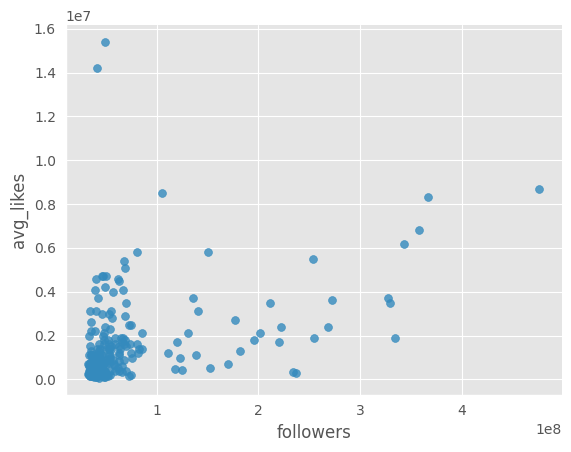

In [ ]:
# @title followers vs avg_likes

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='followers', y='avg_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-36-7f590cdfb6dc>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="industry", y="60_day_eng_rate", palette="coolwarm")


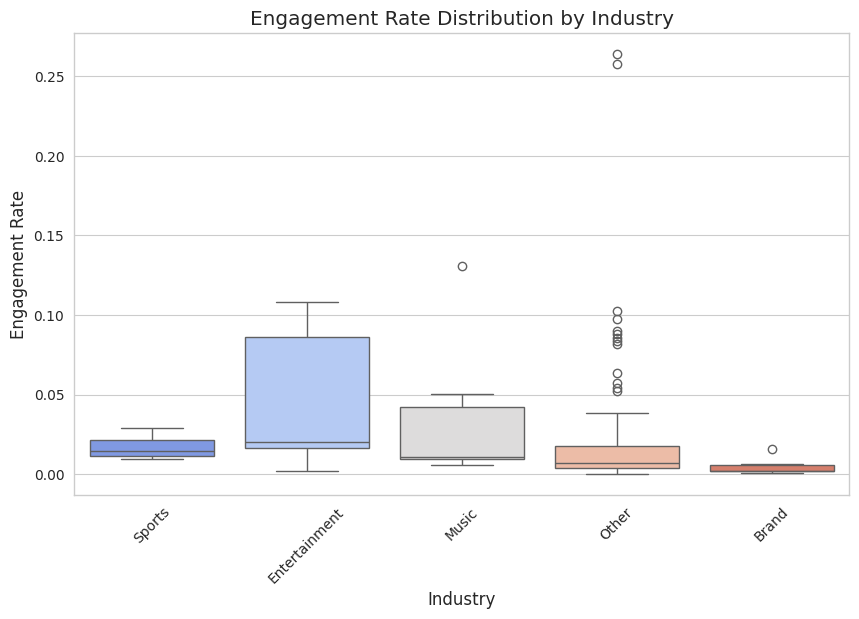

<ipython-input-36-7f590cdfb6dc>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="industry", y="posts", palette="viridis")


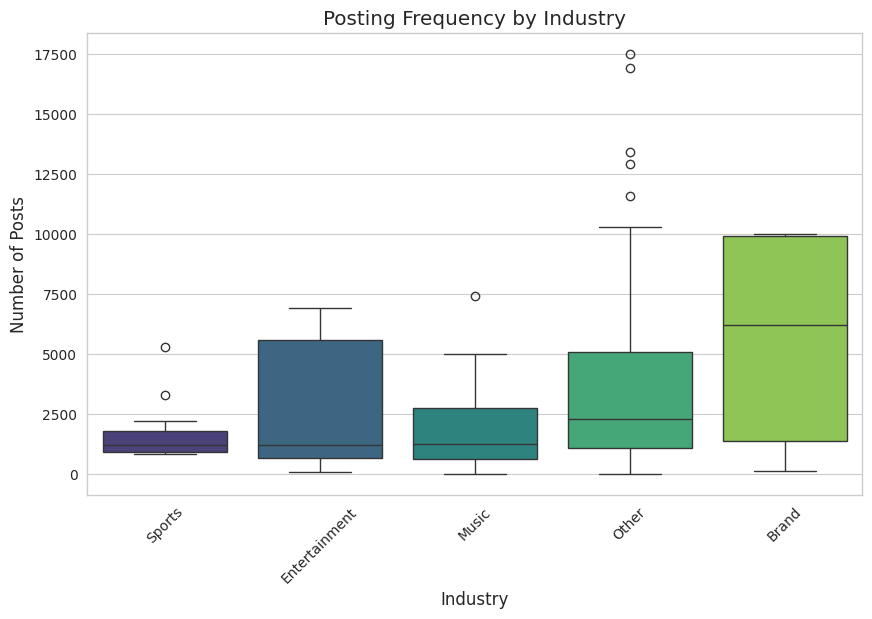


📊 Industry-Wise Engagement & Posting Behavior:
        industry        posts     followers     avg_likes  60_day_eng_rate
0          Brand  5583.333333  8.563333e+07  4.238333e+05         0.004850
1  Entertainment  2873.333333  1.847889e+08  4.833333e+06         0.042978
2          Music  2262.500000  2.010875e+08  3.887500e+06         0.033263
3          Other  3654.666667  6.098424e+07  1.437059e+06         0.017674
4         Sports  1761.818182  1.451727e+08  2.933000e+06         0.016982


In [ ]:

# 1️⃣ Manually mapping influencers to industries
industry_mapping = {
    "cristiano": "Sports",
    "leomessi": "Sports",
    "neymarjr": "Sports",
    "virat.kohli": "Sports",
    "sergioramos": "Sports",
    "mosalah": "Sports",
    "paulodybala": "Sports",
    "k.mbappe": "Sports",
    "garethbale11": "Sports",
    "iamzlatanibrahimovic": "Sports",
    "stephencurry30": "Sports",

    "selenagomez": "Music",
    "arianagrande": "Music",
    "taylorswift": "Music",
    "beyonce": "Music",
    "justinbieber": "Music",
    "shakira": "Music",
    "billieeilish": "Music",
    "theweeknd": "Music",
    "badbunnypr": "Music",

    "therock": "Entertainment",
    "kimkardashian": "Entertainment",
    "kendalljenner": "Entertainment",
    "kyliejenner": "Entertainment",
    "jenniferaniston": "Entertainment",
    "zendaya": "Entertainment",
    "tomholland2013": "Entertainment",
    "sooyaaa__": "Entertainment",
    "milliebobbybrown": "Entertainment",

    "nike": "Brand",
    "adidasoriginals": "Brand",
    "marvelstudios": "Brand",
    "dior": "Brand",
    "juventus": "Brand",
    "fcbarcelona": "Brand",
    "realmadird": "Brand",
}

# Assign industries to dataset
df["industry"] = df["channel_info"].map(industry_mapping).fillna("Other")

# 2️⃣ Engagement Rate Analysis by Industry
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="industry", y="60_day_eng_rate", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Distribution by Industry")
plt.show()

# 3️⃣ Posting Frequency Analysis by Industry
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="industry", y="posts", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Number of Posts")
plt.title("Posting Frequency by Industry")
plt.show()

# 4️⃣ Industry-Wise Summary Statistics
industry_summary = df.groupby("industry")[["posts", "followers", "avg_likes", "60_day_eng_rate"]].mean().reset_index()

# Display industry summary statistics
print("\n📊 Industry-Wise Engagement & Posting Behavior:")
print(industry_summary)


<ipython-input-35-91e4af4a72b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="posting_category", y="60_day_eng_rate", palette="coolwarm")


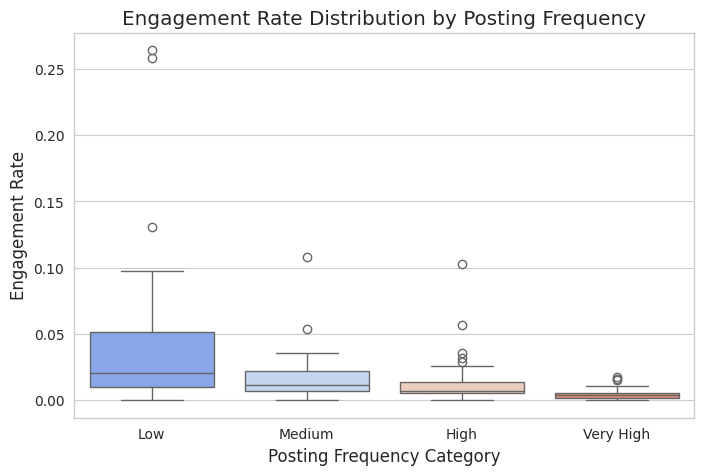

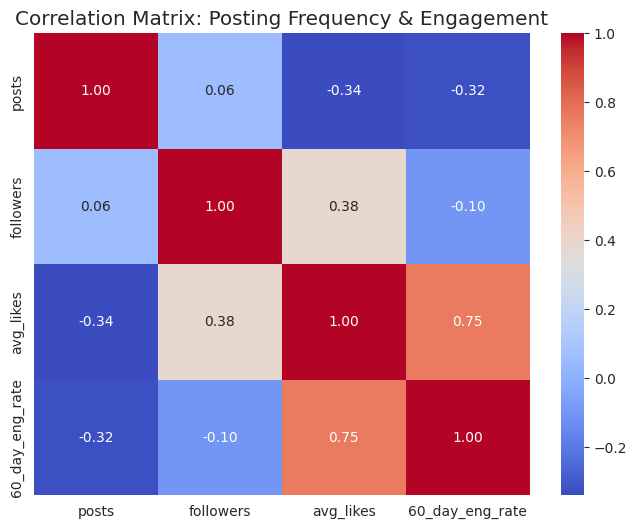

In [ ]:


# Set seaborn style
sns.set_style("whitegrid")


# Engagement Rate Distribution by Posting Frequency Category
df["posting_category"] = pd.qcut(df["posts"], q=4, labels=["Low", "Medium", "High", "Very High"])

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="posting_category", y="60_day_eng_rate", palette="coolwarm")
plt.xlabel("Posting Frequency Category")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Distribution by Posting Frequency")
plt.show()

# Correlation Matrix for Posting Frequency and Engagement
correlation_matrix = df[["posts", "followers", "avg_likes", "60_day_eng_rate"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Posting Frequency & Engagement")
plt.show()


gggggggggggggggggggggggggggggggggggggggggggggg

In [ ]:
import numpy as np
import pandas as pd

# 1. likes_per_post
df['likes_per_post'] = df['total_likes'] / df['posts']

# To avoid dividing by zero if someone has zero posts
df['likes_per_post'] = df['likes_per_post'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 2. likes_to_follower_ratio
df['likes_to_follower_ratio'] = df['avg_likes'] / df['followers']
df['likes_to_follower_ratio'] = df['likes_to_follower_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 3. log_followers
df['log_followers'] = np.log10(df['followers'].replace(0, np.nan))  # Avoid log(0)
df['log_followers'] = df['log_followers'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 4. new_post_engagement_rate
df["new_post_engagement_rate"] = df["new_post_avg_like"] / df["followers"]
df["new_post_engagement_rate"] = df["new_post_engagement_rate"].replace([np.inf, -np.inf], np.nan).fillna(0)



Clustering or Modeling
After feature engineering, you can cluster influencers to uncover natural segments based on new and existing features. Here are two popular methods:

K-Means Clustering:

Good for relatively spherical clusters, interpretability.
Requires choosing the number of clusters
𝑘
k.
Hierarchical Clustering:

Builds a hierarchy (dendrogram). You can choose clusters at any desired level.
More computationally expensive on large datasets.
Below is a K-Means example using StandardScaler on selected features.

Key Takeaways:

Feature Selection: You may include or exclude features depending on relevance (e.g., total_likes vs. likes_per_post).
Scaling is crucial for clustering so that one feature (like followers in the millions) doesn’t dominate.
Interpreting Clusters: Look at summary stats within each cluster to characterize them (e.g., “Cluster 0: high log_followers, high likes_per_post, moderate engagement rate…”).

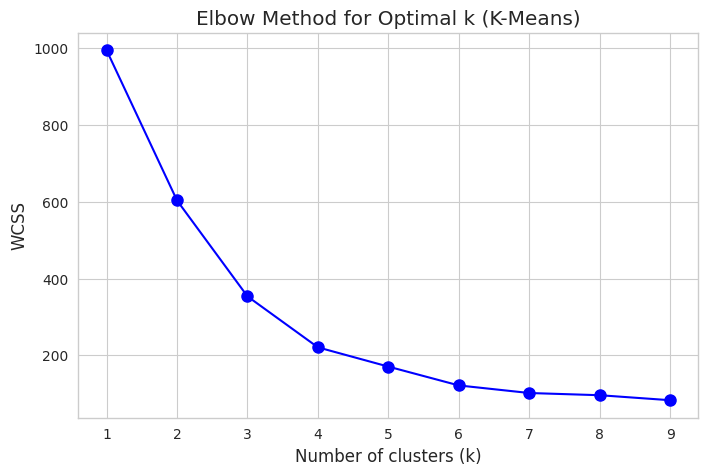

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = ['log_followers', 'likes_per_post', 'likes_to_follower_ratio', '60_day_eng_rate', 'new_post_avg_like']

# Drop rows with missing data in these columns
df_cluster = df[features].dropna().copy()

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# ---------------------------
# K-Means Clustering
# ---------------------------
# Use the elbow method to determine optimal number of clusters
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.show()

Cluster Label Counts:
cluster_label
0    149
2     29
3     19
1      2
Name: count, dtype: int64


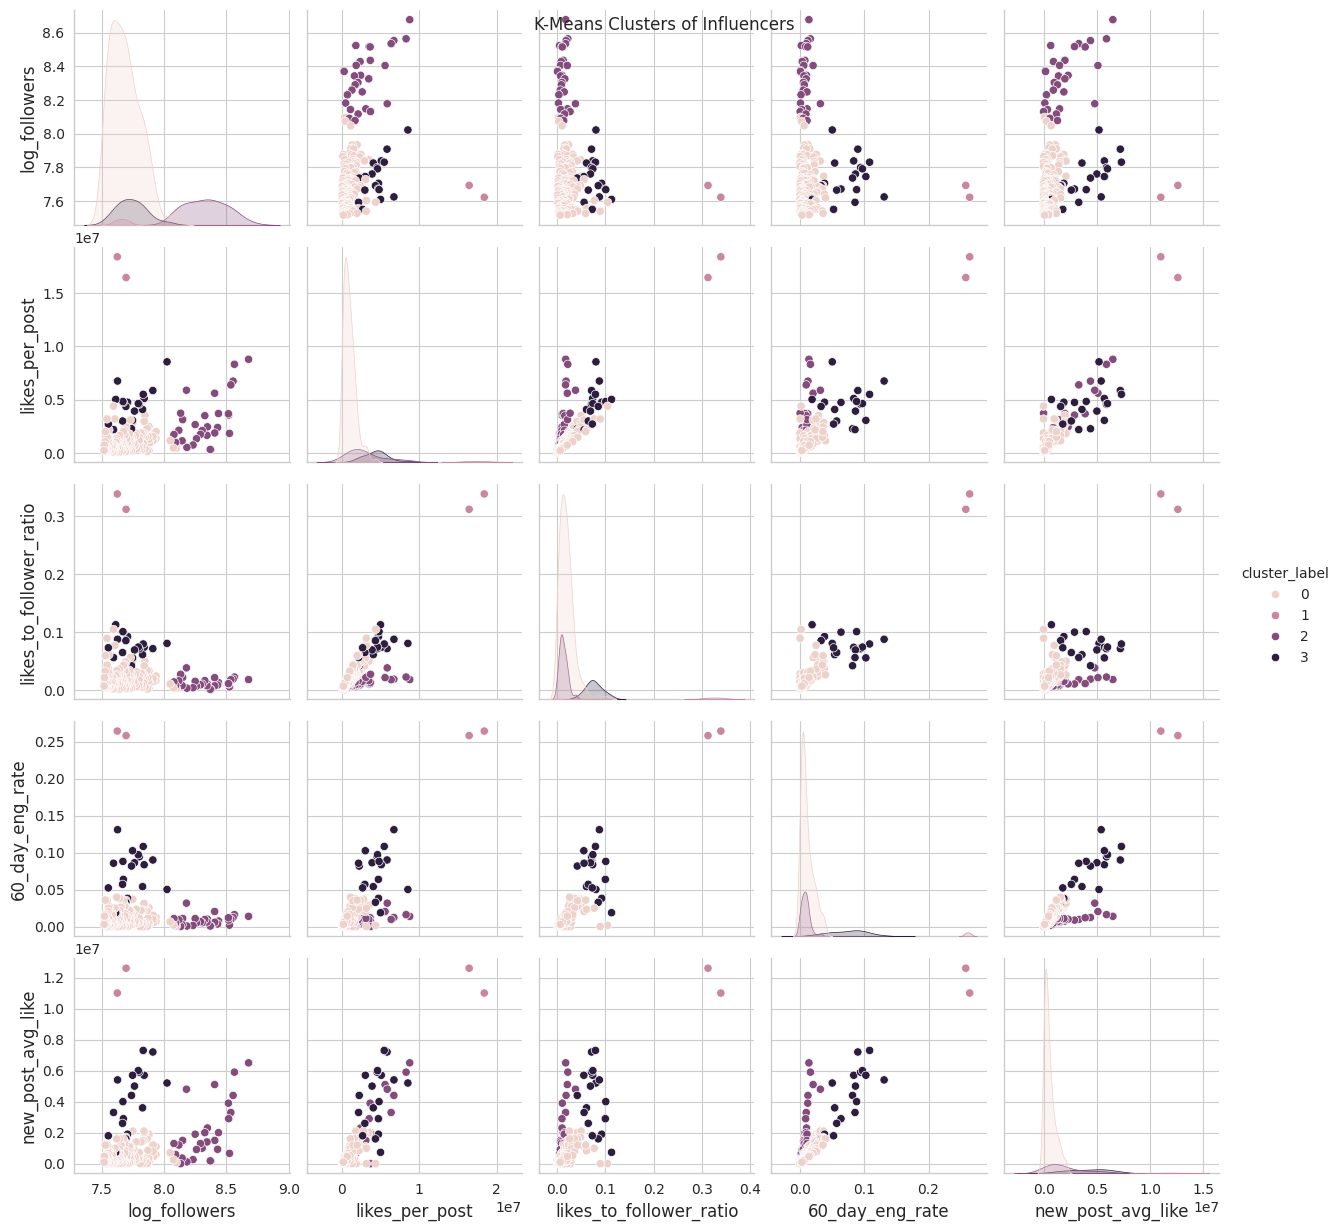

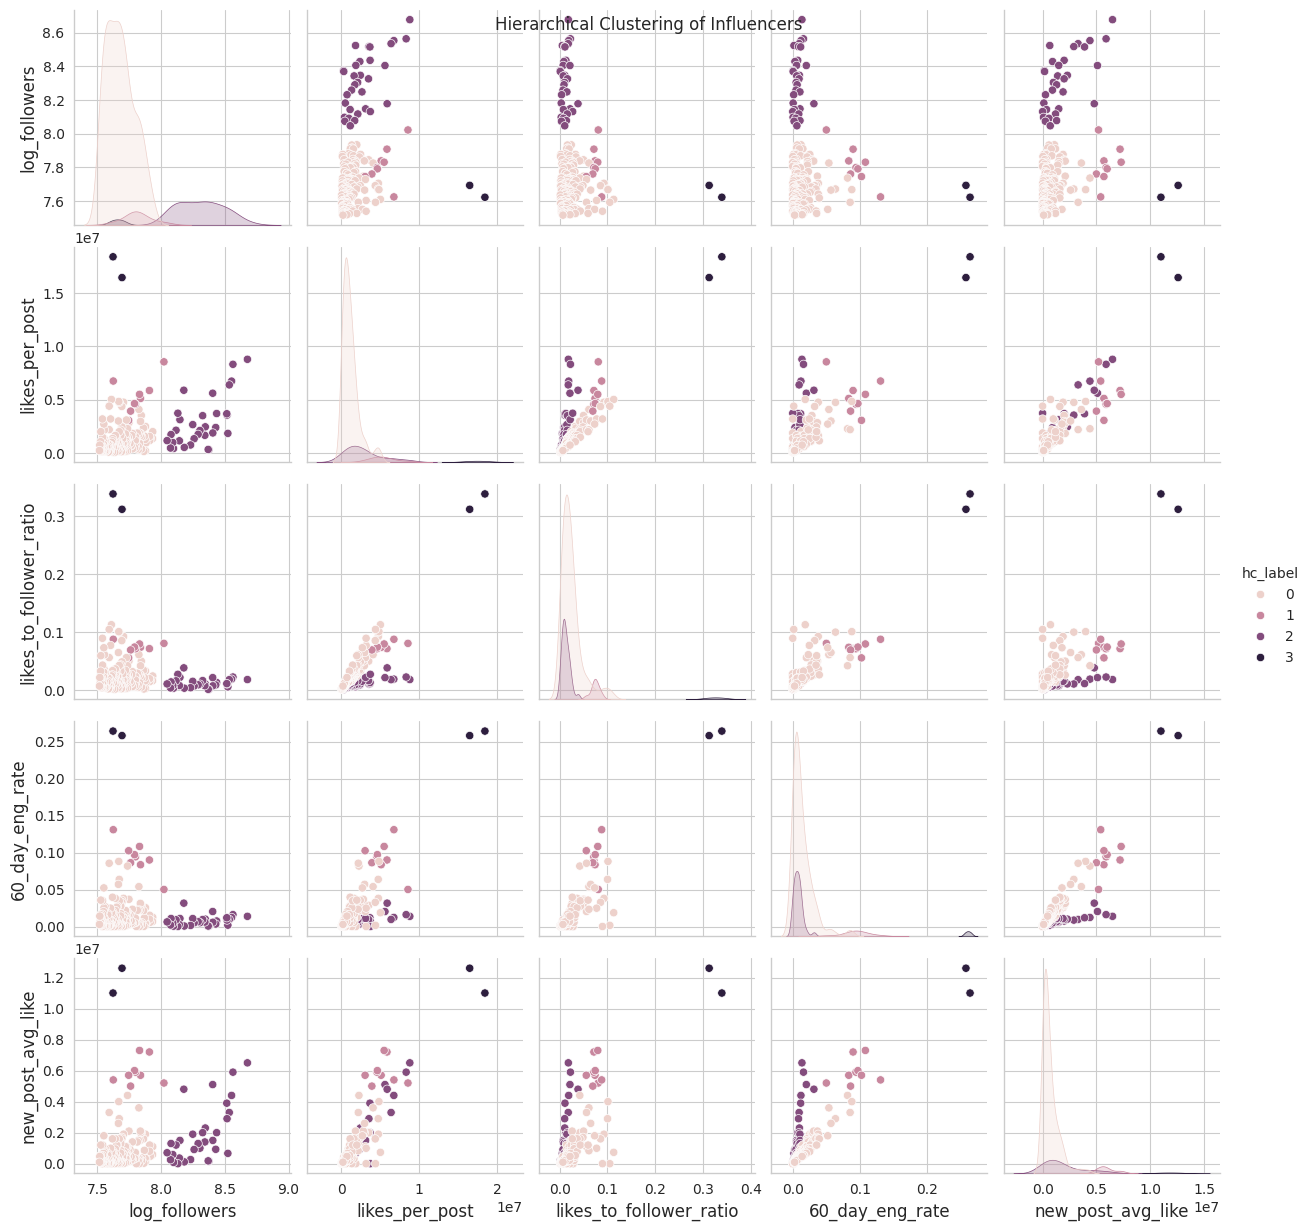

In [ ]:
# Decide on number of clusters (k). Elbow Method for Optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster_label'] = kmeans.fit_predict(X)

# Evaluate cluster sizes
print("Cluster Label Counts:")
print(df_cluster['cluster_label'].value_counts())

# Visualize the distribution of each cluster in a pairplot
sns.pairplot(df_cluster, vars=features, hue='cluster_label', diag_kind='kde')
plt.suptitle("K-Means Clusters of Influencers")
plt.show()

# ---------------------------
# Hierarchical Clustering
# ---------------------------

from sklearn.cluster import AgglomerativeClustering

# Use the same scaled data X from above
hc = AgglomerativeClustering(n_clusters=4)
df_cluster['hc_label'] = hc.fit_predict(X)

sns.pairplot(df_cluster, vars=features, hue='hc_label', diag_kind='kde')
plt.suptitle("Hierarchical Clustering of Influencers")
plt.show()


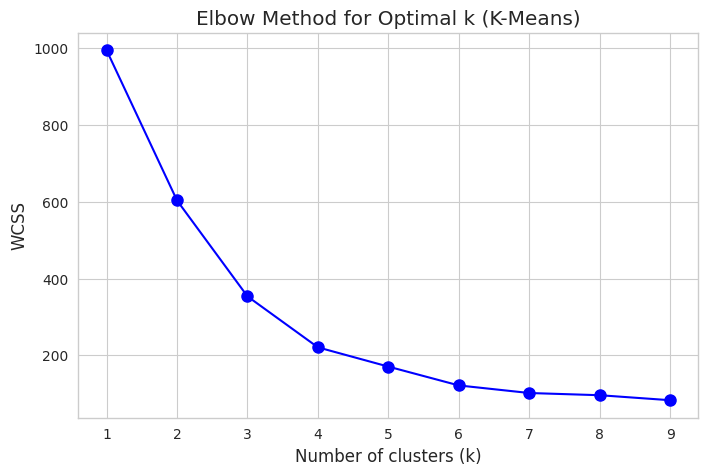

K-Means Silhouette Score (k=4): 0.578


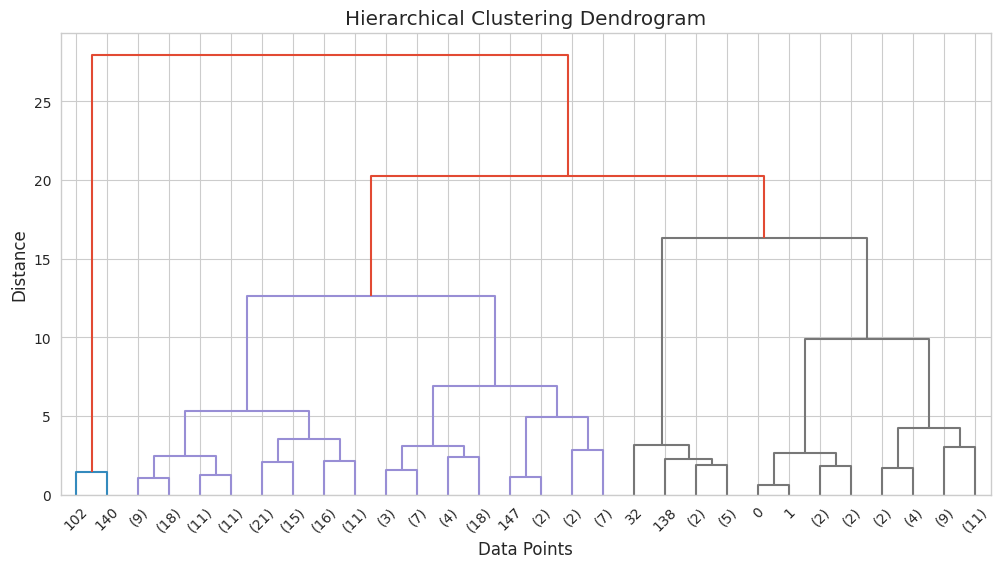

Hierarchical Clustering Silhouette Score (n_clusters=4): 0.538


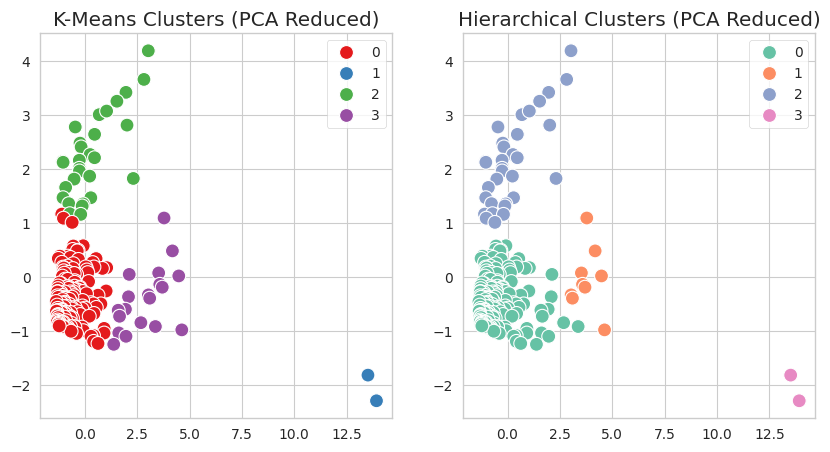

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



# ---------------------------
# K-Means Clustering
# ---------------------------
# Use the elbow method to determine optimal number of clusters
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.show()

# Choose an optimal k (for example, k=4) based on the elbow plot and silhouette score
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score (k={optimal_k}): {silhouette_kmeans:.3f}")

# Add K-Means cluster labels to the dataframe
df_cluster['KMeans_cluster'] = kmeans_labels


# ---------------------------
# Hierarchical Clustering
# ---------------------------
# Generate the linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cut the dendrogram to obtain the same number of clusters (optimal_k)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k,  linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X)
silhouette_hier = silhouette_score(X, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score (n_clusters={optimal_k}): {silhouette_hier:.3f}")

# Add hierarchical clustering labels to the dataframe
df_cluster['Hierarchical_cluster'] = hierarchical_labels




# ---------------------------
# Visualizing Cluster Assignments
# ---------------------------
# For visualization, we can reduce the dimensions using PCA (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set1", s=100)
plt.title('K-Means Clusters (PCA Reduced)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette="Set2", s=100)
plt.title('Hierarchical Clusters (PCA Reduced)')
plt.show()

In [ ]:
cluster_summary = df.groupby("cluster_kmeans")[features].mean()
print(cluster_summary)


                   followers     avg_likes  60_day_eng_rate  likes_per_post  \
cluster_kmeans                                                                
0               5.925796e+07  9.612783e+05         0.009992    9.651205e+05   
1               4.560000e+07  1.480000e+07         0.261050    1.743083e+07   
2               2.884812e+08  4.056250e+06         0.009656    4.078906e+06   
3               5.977083e+07  4.212500e+06         0.064154    4.408374e+06   

                likes_to_follower_ratio  new_post_engagement_rate  
cluster_kmeans                                                     
0                              0.017891                  0.009794  
1                              0.325638                  0.259054  
2                              0.013603                  0.009563  
3                              0.074026                  0.063421  


In [ ]:
cluster_summary = df_cluster.groupby('cluster_label')[features].mean().round(2)
print(cluster_summary)


               log_followers  likes_per_post  likes_to_follower_ratio  \
cluster_label                                                           
0                       7.69       990885.00                     0.02   
1                       7.66     17430833.33                     0.33   
2                       8.34      3068212.91                     0.01   
3                       7.74      4524597.21                     0.08   

               60_day_eng_rate  new_post_avg_like  
cluster_label                                      
0                         0.01          532997.32  
1                         0.26        11800000.00  
2                         0.01         2013065.52  
3                         0.07         4222684.21  


In [ ]:
import numpy as np

# If using K-Means, you can visualize centroid differences
centroids = kmeans.cluster_centers_

# Inverse transform centroids to original scale
centroids_original = scaler.inverse_transform(centroids)

# Create a dataframe for easy viewing
centroid_df = pd.DataFrame(centroids_original, columns=features)
print(centroid_df)


   log_followers  likes_per_post  likes_to_follower_ratio  60_day_eng_rate  \
0       7.685727    9.908850e+05                 0.019926         0.010781   
1       7.657530    1.743083e+07                 0.325638         0.261050   
2       8.335257    3.068213e+06                 0.013051         0.008303   
3       7.738493    4.524597e+06                 0.076622         0.074516   

   new_post_avg_like  
0       5.329973e+05  
1       1.180000e+07  
2       2.013066e+06  
3       4.222684e+06  


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette
score = silhouette_score(X, df_cluster['cluster_label'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.578


3. Reporting & Visualization
Communicating your findings to stakeholders (marketing teams, product managers, etc.) is essential. Some approaches:

Cluster Profiles

Create a table summarizing each cluster’s average values for followers, likes_per_post, engagement_rate, etc.
Example:

In [ ]:
cluster_summary = df_cluster.groupby('cluster_label')[features].mean().round(2)
print(cluster_summary)


Bar Charts or Heatmaps

Show how each cluster differs on key metrics (e.g., average followers, average engagement rate).
Interactive Dashboards (e.g., Plotly Dash, Power BI, Tableau)

If possible, make it interactive so stakeholders can filter by industry or region.
Clear Descriptions

Explain the significance: “Cluster 1 has the highest ratio of likes-to-followers, indicating a niche but highly engaged audience.”

In [ ]:
import numpy as np

# If using K-Means, you can visualize centroid differences
centroids = kmeans.cluster_centers_

# Inverse transform centroids to original scale
centroids_original = scaler.inverse_transform(centroids)

# Create a dataframe for easy viewing
centroid_df = pd.DataFrame(centroids_original, columns=features)
print(centroid_df)


Evaluating the Model
In clustering and segmentation tasks, the concept of “accuracy” is not as straightforward as in supervised learning. Instead, consider:

Internal Cluster Validity Metrics

Silhouette Score: Ranges from -1 to 1; higher indicates better-defined clusters.
Davies–Bouldin Index: Lower is better; measures average similarity between clusters.
Robustness

Does the cluster solution change drastically if you remove some outliers (like mega-influencers) or random subsets of data?
Re-run clustering on a sample or after removing 5% of data to see if results hold.
Speed

K-Means is relatively fast on large datasets, but Hierarchical clustering can become slow if data is huge.
Evaluate run times if you have thousands (or millions) of rows.
Interpretability

K-Means can be easier to explain: each cluster is around a centroid.
Hierarchical clustering provides a dendrogram but can be more complex to interpret for non-technical stakeholders.
Scalability

K-Means scales well with large data, especially with mini-batch variants.
Hierarchical clustering typically does not scale as efficiently for big datasets (O(n^2) or more complexity).

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette
score = silhouette_score(X, df_cluster['cluster_label'])
print(f"Silhouette Score: {score:.3f}")


If the score is close to 1.0, your clusters are quite distinct. Values near 0 indicate overlapping clusters; negative values suggest possible misclustering.

Discussion of Model Performance
Clusters with large standard deviations in key metrics might need further splitting.
High silhouette → well-separated, cohesive clusters.
Low or negative silhouette → might need to try a different number of clusters
𝑘
k or different features.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



# Select features for clustering
features = ['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
X = df_clean[features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# K-Means Clustering
# ---------------------------
# Use the elbow method to determine optimal number of clusters
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.show()

# Choose an optimal k (for example, k=3) based on the elbow plot and silhouette score
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score (k={optimal_k}): {silhouette_kmeans:.3f}")

# Add K-Means cluster labels to the dataframe
df_clean['KMeans_cluster'] = kmeans_labels

# ---------------------------
# Hierarchical Clustering
# ---------------------------
# Generate the linkage matrix using Ward's method
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cut the dendrogram to obtain the same number of clusters (optimal_k)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)
silhouette_hier = silhouette_score(X_scaled, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score (n_clusters={optimal_k}): {silhouette_hier:.3f}")

# Add hierarchical clustering labels to the dataframe
df_clean['Hierarchical_cluster'] = hierarchical_labels

# ---------------------------
# Visualizing Cluster Assignments
# ---------------------------
# For visualization, we can reduce the dimensions using PCA (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set1", s=100)
plt.title('K-Means Clusters (PCA Reduced)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette="Set2", s=100)
plt.title('Hierarchical Clusters (PCA Reduced)')
plt.show()
